In [38]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [39]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month

In [40]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [41]:
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [42]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [43]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')


In [44]:
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df_total_months = df_DA_US.groupby('job_posted_month').size()
df_plot = df_DA_US_pivot.div(df_total_months/100, axis=0)

In [60]:
df_plot = df_plot.reset_index()
df_plot['job_posted_month_name'] = df_plot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_plot = df_plot.set_index('job_posted_month_name')
df_plot = df_plot.drop('job_posted_month', axis=1)

In [62]:
df_plot = df_plot.drop(columns='index')

In [64]:
df_plot = df_plot.iloc[:, :5] 

In [75]:
df_plot

job_skills,sql,excel,tableau,python,power bi
job_posted_month_name,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


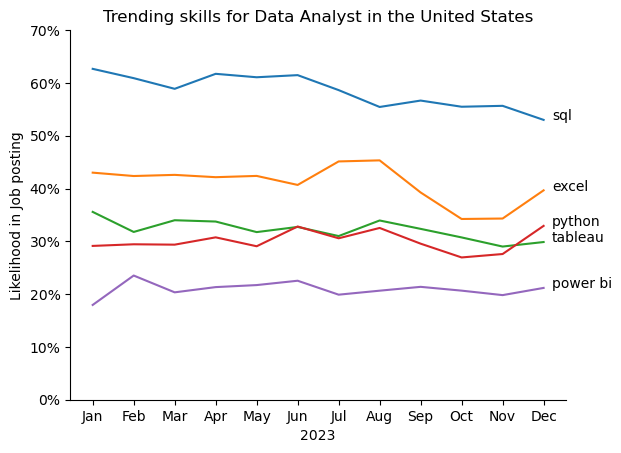

In [88]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10', legend=False)
plt.title("Trending skills for Data Analyst in the United States")
plt.xlabel('2023')
plt.ylabel('Likelihood in Job posting')
plt.ylim(0, 70)
sns.despine()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
plt.show()